In [1]:
# 1 Download some Argo data using argopy.
# -Aim for 15 years of data in a 20deg by 20deg box - i.e., all Argo data in a given region since 2005.
# -The more data the better for estimating the covariance parameters.  When we compute the likelihood, we can just divide the data into chunks of time (each year, or 6 month period, e.g.) and treat each as an independent realizaton, which simplifies the computations considerably.
# -Pick a location of your choice!

In [2]:
from argopy import DataFetcher as ArgoDataFetcher
import cmocean
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker

In [3]:
ilat = -10
flat = 10 + 1
ilon = -130
flon = -110 + 1
idepth = 100
fdepth = 300
idate = "2005-01-01"
fdate = "2005-03-31"
ds = (
    ArgoDataFetcher()
    .region([ilon, flon, ilat, flat, idepth, fdepth, idate, fdate])
    .to_xarray()
)
ds

<xarray.Dataset>
Dimensions:          (N_POINTS: 1556)
Coordinates:
    LATITUDE         (N_POINTS) float64 9.465 9.465 9.465 ... 3.222 3.222 3.222
    LONGITUDE        (N_POINTS) float64 -127.4 -127.4 -127.4 ... -125.4 -125.4
    TIME             (N_POINTS) datetime64[ns] 2005-01-01T09:34:05 ... 2005-0...
  * N_POINTS         (N_POINTS) int64 0 1 2 3 4 5 ... 1551 1552 1553 1554 1555
Data variables:
    CYCLE_NUMBER     (N_POINTS) int64 81 81 81 81 81 81 81 81 ... 1 1 1 1 1 1 1
    DATA_MODE        (N_POINTS) <U1 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D' 'D'
    DIRECTION        (N_POINTS) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_POINTS) int64 5900232 5900232 ... 5900839 5900839
    POSITION_QC      (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PRES             (N_POINTS) float64 105.4 115.3 125.5 ... 270.3 284.3 298.4
    PRES_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PSAL             (N_POINTS) float64 34.71 34.71 34.73 ... 34.83 34.81 34.8
    PSAL_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TEMP             (N_POINTS) float64 12.28 12.06 11.83 ... 11.88 11.62 11.42
    TEMP_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TIME_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           jovyan
    Fetched_date:         2020/08/13
    Fetched_constraints:  phy_[x=-130.00/-109.00; y=-10.00/11.00; z=100.0/300...
    Fetched_uri:          https://www.ifremer.fr/erddap/tabledap/ArgoFloats.n...
    history:              Variables filtered according to DATA_MODE; Variable...

In [4]:
argo_profiles = ds.argo.point2profile()
argo_profiles

<xarray.Dataset>
Dimensions:          (N_LEVELS: 22, N_PROF: 76)
Coordinates:
    LONGITUDE        (N_PROF) float64 -127.4 -111.7 -124.1 ... -127.5 -125.4
    TIME             (N_PROF) datetime64[ns] 2005-01-01T09:34:05 ... 2005-03-...
  * N_PROF           (N_PROF) int64 57 40 66 32 0 8 16 ... 23 31 56 75 48 65 74
  * N_LEVELS         (N_LEVELS) int64 0 1 2 3 4 5 6 7 ... 15 16 17 18 19 20 21
    LATITUDE         (N_PROF) float64 9.465 8.144 1.128 ... 8.425 10.73 3.222
Data variables:
    CYCLE_NUMBER     (N_PROF) int64 81 67 10 26 68 68 68 ... 75 75 75 1 75 89 1
    DATA_MODE        (N_PROF) <U1 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D' 'D'
    DIRECTION        (N_PROF) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_PROF) int64 5900232 4900313 5900646 ... 5900232 5900839
    POSITION_QC      (N_PROF) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    PRES             (N_PROF, N_LEVELS) float64 105.4 115.3 ... 284.3 298.4
    PRES_QC          (N_PROF) int64 1 2 1 2 2 2 2 2 1 1 ... 2 2 2 2 2 1 1 2 1 1
    PSAL             (N_PROF, N_LEVELS) float64 34.71 34.71 34.73 ... 34.81 34.8
    PSAL_QC          (N_PROF) int64 1 2 1 2 1 2 2 2 1 1 ... 1 2 2 2 2 1 1 2 1 1
    TEMP             (N_PROF, N_LEVELS) float64 12.28 12.06 ... 11.62 11.42
    TEMP_QC          (N_PROF) int64 1 2 1 2 1 2 2 2 1 1 ... 1 2 2 2 2 1 1 2 1 1
    TIME_QC          (N_PROF) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           jovyan
    Fetched_date:         2020/08/13
    Fetched_constraints:  phy_[x=-130.00/-109.00; y=-10.00/11.00; z=100.0/300...
    Fetched_uri:          https://www.ifremer.fr/erddap/tabledap/ArgoFloats.n...
    history:              Variables filtered according to DATA_MODE; Variable...

In [5]:
# 2 Interpolate each profile vertically onto a pressure/depth surface of your choice

In [6]:
argo_interp = argo_profiles.argo.interp_std_levels([250])
argo_interp

<xarray.Dataset>
Dimensions:            (N_PROF: 76, PRES_INTERPOLATED: 1)
Coordinates:
    LONGITUDE          (N_PROF) float64 -127.4 -111.7 -124.1 ... -127.5 -125.4
    TIME               (N_PROF) datetime64[ns] 2005-01-01T09:34:05 ... 2005-0...
  * N_PROF             (N_PROF) int64 57 40 66 32 0 8 16 ... 31 56 75 48 65 74
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 250
    LATITUDE           (N_PROF) float64 9.465 8.144 1.128 ... 8.425 10.73 3.222
Data variables:
    CYCLE_NUMBER       (N_PROF) float64 81.0 67.0 10.0 26.0 ... 75.0 89.0 1.0
    DATA_MODE          (N_PROF) object 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION          (N_PROF) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) float64 5.9e+06 4.9e+06 ... 5.9e+06 5.901e+06
    PRES               (N_PROF, PRES_INTERPOLATED) float64 250.0 250.0 ... 250.0
    PSAL               (N_PROF, PRES_INTERPOLATED) float64 34.71 34.73 ... 34.85
    TEMP               (N_PROF, PRES_INTERPOLATED) float64 10.43 10.63 ... 12.12
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           jovyan
    Fetched_date:         2020/08/13
    Fetched_constraints:  phy_[x=-130.00/-109.00; y=-10.00/11.00; z=100.0/300...
    Fetched_uri:          https://www.ifremer.fr/erddap/tabledap/ArgoFloats.n...
    history:              Variables filtered according to DATA_MODE; Variable...

In [7]:
selected_vars = argo_interp[["LATITUDE", "LONGITUDE", "TIME", "TEMP"]]
selected_vars

<xarray.Dataset>
Dimensions:            (N_PROF: 76, PRES_INTERPOLATED: 1)
Coordinates:
    LATITUDE           (N_PROF) float64 9.465 8.144 1.128 ... 8.425 10.73 3.222
    LONGITUDE          (N_PROF) float64 -127.4 -111.7 -124.1 ... -127.5 -125.4
    TIME               (N_PROF) datetime64[ns] 2005-01-01T09:34:05 ... 2005-0...
  * N_PROF             (N_PROF) int64 57 40 66 32 0 8 16 ... 31 56 75 48 65 74
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 250
Data variables:
    TEMP               (N_PROF, PRES_INTERPOLATED) float64 10.43 10.63 ... 12.12
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           jovyan
    Fetched_date:         2020/08/13
    Fetched_constraints:  phy_[x=-130.00/-109.00; y=-10.00/11.00; z=100.0/300...
    Fetched_uri:          https://www.ifremer.fr/erddap/tabledap/ArgoFloats.n...
    history:              Variables filtered according to DATA_MODE; Variable...

In [8]:
# 3 Find the "mean state" of temperature by fitting 2d polynomials using a least squares fit.
# -It may also be important to add a seasonal cycle, modeled as a linear combination of seasonal harmonics

In [9]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.optimize import lsq_linear
from typing import Iterable


def get_harmonics(nharmonics, time, period=365):
    """Compute the requested number of harmonics
    for a set time.
    
    Parameters
    ----------
    nharmonics : int
        Number of harmonics to compute
    time : int, Iterable
        Time point within period of oscillation.
        This can be either a single int or a 1d-array
    period : int, optional
        Period of oscillation
        
    Returns
    -------
    harmonics: 2d-array
        Array of shape (len(time), nharmonics*2) where
        nharmonics*2 accounts for the cos and sin terms.
    """
    harmonics = np.arange(1, nharmonics + 1)
    if isinstance(time, Iterable):
        time = np.asarray(time)[:, np.newaxis]
        harmonics = harmonics[np.newaxis, :]
    phase = 2 * np.pi * harmonics * time / period
    return np.concatenate([np.cos(phase), np.sin(phase)], axis=-1)


def build_basis(lat, lon, time, nharmonics):
    """Build the 2d local polynomial regression basis
    according to Park2020
    """
    local_polynomlial_reg = np.ones((*lat.shape, 6 + nharmonics * 2))
    local_polynomlial_reg[..., 1] = lon
    local_polynomlial_reg[..., 2] = lat
    local_polynomlial_reg[..., 3] = lon * lat
    local_polynomlial_reg[..., 4] = lon ** 2
    local_polynomlial_reg[..., 5] = lat ** 2
    local_polynomlial_reg[..., 6:] = get_harmonics(nharmonics, time)
    return local_polynomlial_reg


def find_mean_state(lat, lon, time, data, nharmonics=2):
    """Find the mean state
    
    Parameters
    ----------
    lat, lon, time, data : 1d-array
        Arrays containing latitude, longitude, day of year and
        data.
    nharmonics: int, optional
        Number of harmonics to add into the basis functions
    """
    return lsq_linear(build_basis(lat, lon, time, nharmonics), data)

In [10]:
mean_state_fit = find_mean_state(
    selected_vars.LATITUDE,
    selected_vars.LONGITUDE,
    selected_vars.TIME.dt.dayofyear,
    selected_vars.TEMP.data.flatten(),
)
mean_state_fit

 active_mask: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
        cost: 7.483616564532252
         fun: array([ 0.16926511,  0.14609991, -0.6308705 , -0.1421511 , -0.05069652,
       -0.34793902, -0.13721604,  0.69966104,  0.63837689, -0.02203378,
        0.18588829, -0.46418286,  0.00903633, -0.11147817, -0.15377594,
       -0.05766174, -0.33710223,  0.66454641, -0.15616073, -0.16602798,
       -0.60269639,  0.19607102, -0.14302369, -0.11055621, -0.18120937,
        0.5178851 ,  0.87690062, -0.15707167,  0.08110754, -0.74363138,
        0.35442018,  0.3193874 ,  0.0159411 ,  0.14901831, -0.1153081 ,
        0.85413791,  0.12684599, -0.15315853, -0.55147635,  0.22573403,
        0.04451875, -0.14513155, -0.22075426, -0.32323777,  0.46263424,
       -0.30521813, -0.30931618, -0.83439676,  0.17875969, -0.31936098,
        0.34786892,  0.03662904,  1.00664088,  0.15743499, -0.20687   ,
       -0.40613403, -0.98195006,  0.20404723, -0.09531576,  0.39868155,
        0.00401437,  1.12866

In [11]:
lat = np.arange(ilat, flat)
lon = np.arange(ilon, flon)
llon, llat = np.meshgrid(lon, lat)
mean_state = np.matmul(build_basis(llat, llon, 40, 2), mean_state_fit.x)

In [23]:
xmean_state = xr.DataArray(mean_state, coords=[("lat", lat), ("lon", lon)])
xmean_state

<xarray.DataArray (lat: 21, lon: 21)>
array([[15.42753801, 15.37138989, 15.2826996 , 15.16146713, 15.00769248,
        14.82137565, 14.60251664, 14.35111546, 14.0671721 , 13.75068656,
        13.40165885, 13.02008895, 12.60597688, 12.15932263, 11.6801262 ,
        11.1683876 , 10.62410682, 10.04728386,  9.43791872,  8.7960114 ,
         8.12156191],
       [14.94671001, 14.91181756, 14.84438294, 14.74440613, 14.61188715,
        14.44682599, 14.24922266, 14.01907714, 13.75638945, 13.46115958,
        13.13338753, 12.7730733 , 12.3802169 , 11.95481832, 11.49687756,
        11.00639462, 10.48336951,  9.92780221,  9.33969274,  8.71904109,
         8.06584727],
       [14.48443133, 14.47079455, 14.42461559, 14.34589446, 14.23463114,
        14.09082565, 13.91447798, 13.70558813, 13.46415611, 13.19018191,
        12.88366553, 12.54460697, 12.17300623, 11.76886332, 11.33217823,
        10.86295096, 10.36118151,  9.82686988,  9.26001608,  8.6606201 ,
         8.02868194],
       [14.04070196, 14.04832085, 14.02339756, 13.96593209, 13.87592445,
        13.75337462, 13.59828262, 13.41064844, 13.19047208, 12.93775355,
        12.65249284, 12.33468994, 11.98434488, 11.60145763, 11.18602821,
        10.7380566 , 10.25754283,  9.74448687,  9.19888873,  8.62074842,
         8.01006593],
...
       [ 9.77616862, 10.08136685, 10.35402291, 10.59413679, 10.80170849,
        10.97673802, 11.11922536, 11.22917053, 11.30657352, 11.35143434,
        11.36375297, 11.34352943, 11.29076371, 11.20545581, 11.08760574,
        10.93721349, 10.75427905, 10.53880245, 10.29078366, 10.0102227 ,
         9.69711955],
       [ 9.61067894,  9.93713284, 10.23104456, 10.49241411, 10.72124148,
        10.91752667, 11.08126969, 11.21247053, 11.31112918, 11.37724567,
        11.41081997, 11.4118521 , 11.38034204, 11.31628981, 11.21969541,
        11.09055882, 10.92888006, 10.73465912, 10.507896  , 10.2485907 ,
         9.95674323],
       [ 9.46373857,  9.81144814, 10.12661553, 10.40924075, 10.65932378,
        10.87686464, 11.06186333, 11.21431983, 11.33423416, 11.42160631,
        11.47643628, 11.49872407, 11.48846969, 11.44567313, 11.37033439,
        11.26245347, 11.12203037, 10.9490651 , 10.74355765, 10.50550802,
        10.23491621],
       [ 9.33534751,  9.70431275, 10.04073581, 10.34461669, 10.6159554 ,
        10.85475193, 11.06100628, 11.23471845, 11.37588844, 11.48451626,
        11.5606019 , 11.60414536, 11.61514664, 11.59360575, 11.53952268,
        11.45289743, 11.33373   , 11.1820204 , 10.99776861, 10.78097465,
        10.53163851]])
Coordinates:
  * lat      (lat) int64 -10 -9 -8 -7 -6 -5 -4 -3 -2 -1 0 1 2 3 4 5 6 7 8 9 10
  * lon      (lon) int64 -130 -129 -128 -127 -126 ... -114 -113 -112 -111 -110

In [24]:
# 4 plot the original data and the mean state and make sure it looks sensible

In [84]:
title_size = 14
ax_size = 12

Text(0.5, 1.0, 'Original Data')

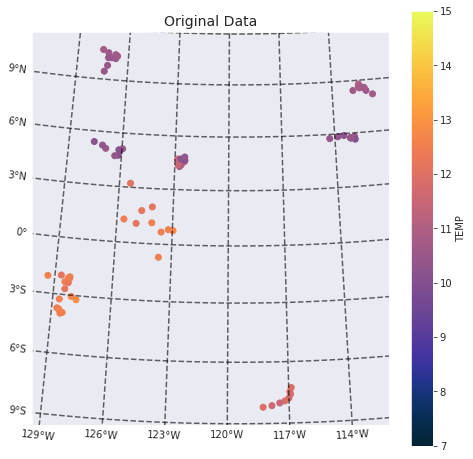

In [85]:
'''ORIGINAL DATA'''
fig = plt.figure(figsize = (8,8))

'''Projections'''
proj = ccrs.LambertConformal(central_longitude = (ilon+flon)/2, central_latitude = (ilat+flat)/2)
cmap = cmocean.cm.thermal #setting colormap
ax = plt.axes(projection = proj)

'''Plot'''
selected_vars.plot.scatter(x='LONGITUDE', y='LATITUDE', hue='TEMP', cmap = cmap, 
                           vmin = 7, vmax = 15, transform = ccrs.PlateCarree())
coast_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='k', facecolor='0.7')
ax.add_feature(coast_50m)

'''Gridlines'''
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False,
                  linewidth=1.5, color='black', alpha=0.6, linestyle='--')
gl.right_labels = False
gl.top_labels = False
gl.xlocator = mticker.FixedLocator([-129,-126,-123,-120,-117,-114])
plt.title('Original Data', size = title_size)

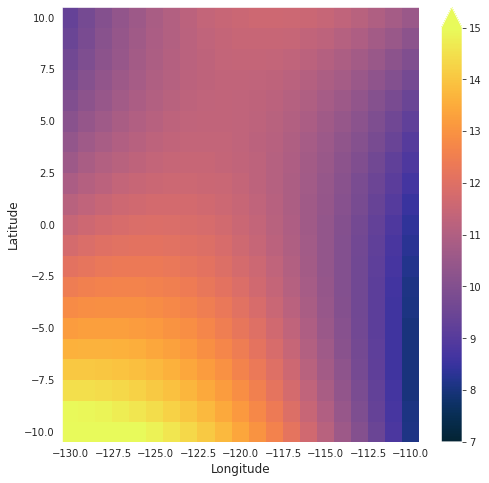

In [86]:
'''MEAN STATE'''
fig = plt.figure(figsize = (8,8))

plot_kwargs = dict(cmap=cmap, vmax=15, vmin=7)
plot = xmean_state.plot(**plot_kwargs)

plt.xlabel('Longitude', size = ax_size)
plt.ylabel('Latitude', size = ax_size)
plt.show()
